# Project: Investigate a Dataset - [TMDb Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains information about 10,000 movies collected from TMDb, including user ratings and the budget and revenues of each movie as well. some column as 'overview' is not necessary for our analysis. The data set also contains two final columns ending with "_adj", which converts the budget and revenues in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis

  1- What kinds of properties are associated with movies that have high revenues?
  
  2- Does the Runtime of a movie affecting the average rate?
  
  3- which production company has the greater average revenue over the dataset?


In [65]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

<a id='wrangling'></a>
## Data Wrangling



In [66]:
#loading data 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [68]:
#check that each column has the right data type(ex: runtime should be int)
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [69]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [70]:
#chick the number of NaN or missing values in the data set
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [71]:
#exploring numric data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [72]:
#check for duplicates 
sum(df.duplicated())

1

Notes: 

1- Each column has the the appropriate data type according to the output of 'dtype' function.

2- 9 columns have missing values as we found from the output of the 'info()' and 'isna()' functions.

3- Some columns have '0' as value, and some columns as runtime has extremes values, according to 'describe()' function.

4- just one duplicated value was found accourding to 'duplicated()' function.


### Data Cleaning

  **1. removing unnecessary columns.**
  
Note: unnecessary columns as 'id' and 'imdb_id' because it is not helpful for our analysis.

##### The data set given is distributed along too many years (release year), so the value of the money in budget and revenue columns is different from year to year affected by many factors and one of them is inflation, so, in order to be consistent we will keep the "revenue_adj" and "budget_adj" as the value was adjusted to be the value of 2010's money value. Also columns such as: 'hompage', 'overview', 'tagline' are not necessary at all in our analysis. 'release_date' is not necessary also as we have a column of the release year and that all we need from the release date.

  **2. removing NaN or missing values.**
  
  **3. removing extremes values from runtime column.**
column as runtime is measured by minutes, and some values are not rational, or we may consider these values as extremes (ex: 900min).

  **4. fixing Genres and Production Companies values to be consistent.**
genres and production companies columns values are messy, removing the '|' sign and should left just one genre for each movie and this to be consistent.


In [73]:
#removing unnecessary columns
df.drop(["id","imdb_id","homepage","tagline","keywords","overview","release_date","budget","revenue"], axis=1, inplace=True)
#check the data after removinf unnecessary columns
df

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00


In [74]:
#removing NaN values
df.dropna(inplace=True)
#check that no NaN values in the data set
df.isna().sum()

popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### It makes sense that in general there is no movie runtime exceeds 200 minutes and in the other hand, there is no movie has a runtime less than 45 minutes.

In [75]:
#extracting movies with extremes more than 200 min
runtime_extremes_1 = df.query('runtime>200')
#extractig movies with extremes less than 45 min
runtime_extremes_2 = df.query('runtime<45')

#drop 'runtime_extremes_1' and 'runtime_extremes_2' from the data set
df.drop(runtime_extremes_1.index, inplace= True)
df.drop(runtime_extremes_2.index, inplace= True)

#check that there is no extremes anymore
sum(df['runtime']>200)
sum(df['runtime']<45)

0

In [76]:
#making the genres column consistent by split() function to keep the first word only
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])
#check for that genres value is just one word

#making production companies column consistent by split() function to keep the first word only
df['production_companies']=df['production_companies'].apply(lambda x: x.split("|")[0])
df

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,Summit Entertainment,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,Lucasfilm,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,Universal Pictures,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action,Cherokee Productions,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery,Mosfilm,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action,Benedict Pictures Corp.,22,5.4,1966,0.000000e+00,0.000000e+00


<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1: What kinds of properties are associated with movies that have high revenues?

### In order to make any comparison depends on the revenue column, all movies should have information about revenue. so we have to clean the data from any missing information about revenue. We should remove any movie has no information about budget as the budget is relatable to our analysis

In [77]:
#extracting movies without information about revenue
zero_revenue = df[df['revenue_adj']==0]

In [78]:
#extracting movies without information about budget
zero_budget = df[df['budget_adj']==0]

In [79]:
#creating a data frame with complete info about revenue and budget
#remove movies with no info about revenue
complete_revenue_budget = df.drop(zero_revenue.index)
#remove movies with no info about budget
complete_revenue_budget = df.drop(zero_budget.index)

### We need to divide the data to two data frames, one holds the movies above the average of revenue and the other holds the movies below average of revenue. To get the average by "mean", we need to make sure that the values of the data set are normally distributed, otherwise we calculate the "median", as it is more accurate to represent the average of any data which is not nomrally distributed.

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

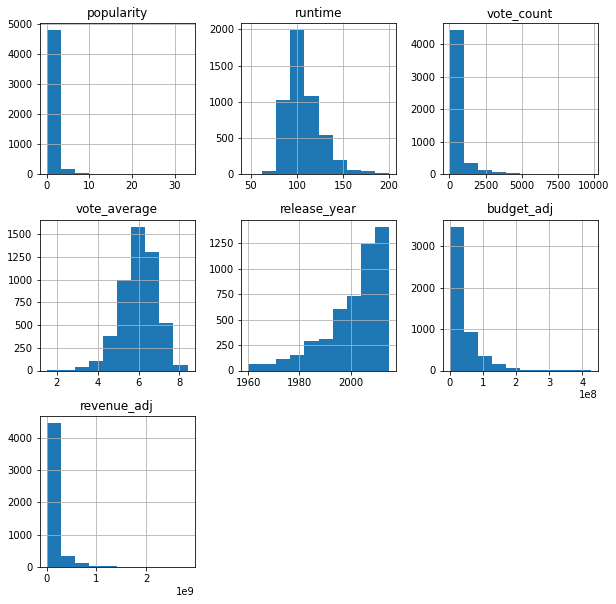

In [81]:
#check the distribution of the data
complete_revenue_budget.hist(figsize=(10,10))

### As we can see from the above .hist() function, revenue and budget values are not normally distributed. So, the median will be more accurate to represent the average.

In [82]:
#calculating revenue median
revenue_median = complete_revenue_budget['revenue_adj'].median()

In [83]:
#creating df1 contains movies with revenue greater than median
df1 = complete_revenue_budget[complete_revenue_budget['revenue_adj']>= revenue_median]

In [84]:
#creating df2 contains movies with revenue less than median
df2 = complete_revenue_budget[complete_revenue_budget['revenue_adj']< revenue_median]

### Below is Creating a bar chart to check the relation between budget and revenue

Text(0, 0.5, 'Average Budget(in millions)')

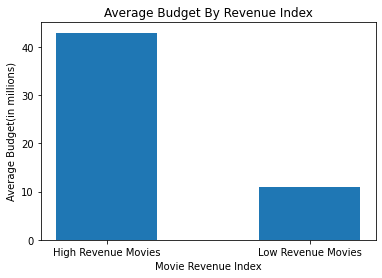

In [85]:
#get the median of budget for df1 (high revenue movies) and for df2 (low revenue_movies)
high_revenue_budget_median = round(df1['budget_adj'].median()/1000000) #dividing by million to make the number more understandable
low_revenue_budget_median = round(df2['budget_adj'].median()/1000000)

#create the bar chart
locations = [1,2]
heights = [high_revenue_budget_median, low_revenue_budget_median]
labels = ['High Revenue Movies', 'Low Revenue Movies' ]
plt.bar(locations, heights, tick_label=labels, width=0.5)
plt.title('Average Budget By Revenue Index')
plt.xlabel('Movie Revenue Index')
plt.ylabel('Average Budget(in millions)')

### Notice above that the average budget of the high revenue movies is greater than the average budget of low revenue movies and the difference is significant. But, in order to say that there is a positive relation between revenue and budget (as the budget increases, revenue increases) we need to apply any correlation method. I'm going to use "Pearson" correlation method.

In [86]:
#creating a variable holds the data of the columns want to be correlated for the whole data (high and low revenue movies)
combined_data = complete_revenue_budget[['budget_adj','revenue_adj']]

#applying correlation using pearson correlation
combined_data_correlation = combined_data.corr(method='pearson')

#check for the "Pearson's r" value (check the linear relation between revenue and budget)
combined_data_correlation

,budget_adj,revenue_adj
budget_adj,1.000000,0.589433
revenue_adj,0.589433,1.000000


### As we can see above "Pearson's Correlation Coefficient (r) = 0.59 and according to the scale of Pearson's Correlation Coefficient (r), this indicates Moderate to High positive correlation.

### Check for the Pearson's Correlation Coefficient (r) in each data frame separately.

#### check Pearson's Correlation Coefficient (r) for df1 (movies with high revenue - above the revenue median)

In [87]:
#creating a variable holds the budget and revenue of df1 (high revenue movies)
df1_data = df1[['budget_adj', 'revenue_adj']]
#applying correlation using pearson correlation
df1_correlation = df1_data.corr(method='pearson')
#check for the "Pearson's r" value (check the linear relation between revenue and budget)
df1_correlation

,budget_adj,revenue_adj
budget_adj,1.000000,0.504699
revenue_adj,0.504699,1.000000


##### Pearson's Correlation Coefficient (r) = 0.49, and this is low positive correlation.

#### check Pearson's Correlation Coefficient (r) for df2 (movies with low revenue - below the revenue median)

In [88]:
#creating a variable holds the budget and revenue of df1 (high revenue movies)
df2_data = df2[['budget_adj', 'revenue_adj']]
#applying correlation using pearson correlation
df2_correlation = df2_data.corr(method='pearson')
#check for the "Pearson's r" value (check the linear relation between revenue and budget)
df2_correlation

,budget_adj,revenue_adj
budget_adj,1.000000,0.235959
revenue_adj,0.235959,1.000000


##### Pearson's Correlation Coefficient (r) = 0.32, and this is negligible to very low positive correlation.

### From the correlations above we can say that in general there is a Moderate to High positive correlation between the Budget and Revenue. But, we can notice from df1_correlation and df2_correlation that the bigger the Budget is the higher the poisitive correlation is. 

### In the end, we can say that there is a budget range where: 1 - If the budget of the movie is lower than that range, the propability of the revenue to be high is very low. 2- if the budget of the movie is greater than that range, the propability of the revenue to be high is moderate to high.

## create a bar chart to check the relation between the popularity of a movie and its revenue

Text(0, 0.5, 'Average Popularity')

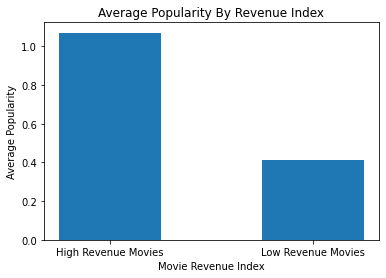

In [89]:
high_revenue_pop_median = df1['popularity'].median()
low_revenue_pop_median = df2['popularity'].median()

locations = [1,2]
heights = [high_revenue_pop_median, low_revenue_pop_median]
labels = ['High Revenue Movies', 'Low Revenue Movies' ]
plt.bar(locations, heights, tick_label=labels, width=0.5)
plt.title('Average Popularity By Revenue Index')
plt.xlabel('Movie Revenue Index')
plt.ylabel('Average Popularity')

### Note: notice above that high revenue movies are the best in popularity wise. Maybe one of the proplems with low revenue moveis is Marketing issues. 

### Let's use Pearson's Correlation on popularity against revenue

In [90]:
#creating variable holds popularity and revenue columns
popularity_data = complete_revenue_budget[['popularity', 'revenue_adj']]
#applying correlation using pearson correlation
pop_data_correlation = popularity_data.corr(method='pearson')
#check for the "Pearson's r" value
pop_data_correlation

,popularity,revenue_adj
popularity,1.000000,0.571674
revenue_adj,0.571674,1.000000


### As we can see above that Pearson's Correlation Coefficient (r) = 0.556, and this is a Moderate to High positive correlation between popularity and revenue (as the popularity increases, the revenue increases).

## check what are the genres that were produced the most in df1 (high revenue movies)

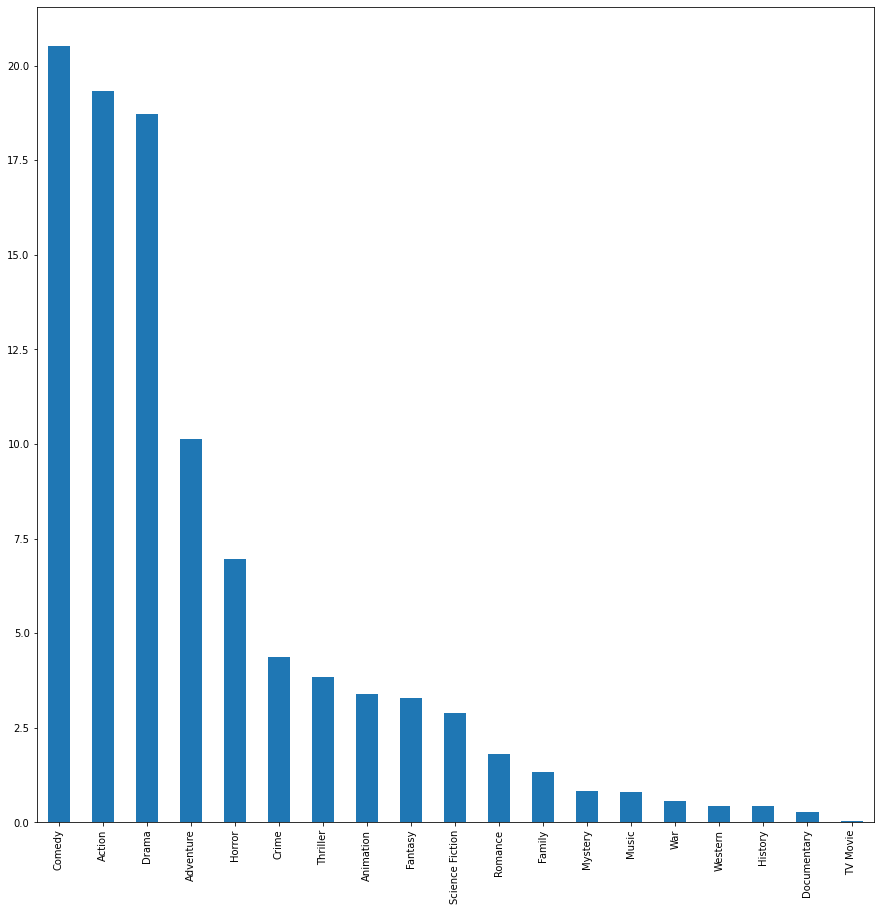

In [91]:
#sum count of all genres
df1_genres_sum_count = df1['genres'].count()
#extracting the count of each genre
df1_genres_count = df1['genres'].value_counts()
#percentage of each genre
df1_genres_percentage = (df1_genres_count / df1_genres_sum_count)*100
#making a bar chart to see the share of each genres
high_revenue_genres_plot = df1_genres_percentage.plot(kind='bar',figsize=(15,15))

### Notice from above chart that the top 5 genres in df1( high revenue movies) are: Comedy, Action, Drama, Adventure, and Horror.
**Y axis represent percentage of genres %**

### check the above top 5 genres in df2 (low revenue moveis)

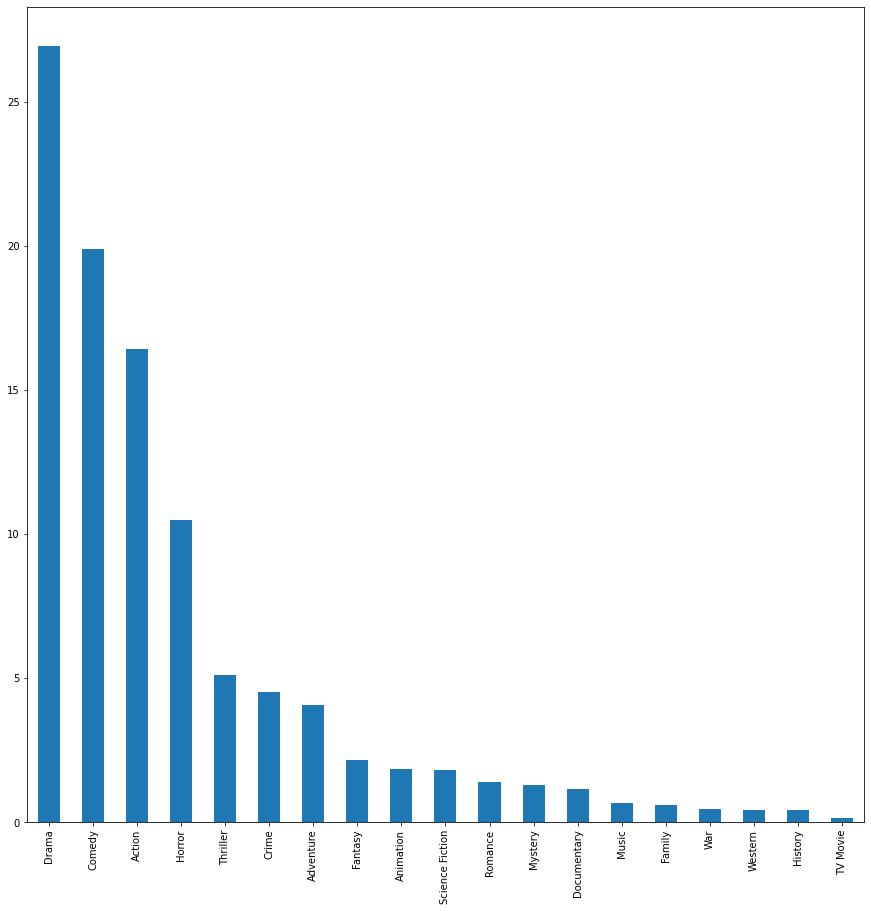

In [92]:
#check the total count of all different genres
df2_genres_sum_counts=df2['genres'].count()
#get the count of each genres
df2_genres_counts= df2['genres'].value_counts()
#get the percentage of every count
df2_genres_percentage=(df2_genres_counts/df2_genres_sum_counts)*100
#creating a bar chart to see the share of each genre
low_revenue_genres_plot=df2_genres_percentage.plot(kind='bar', figsize=(15,15))

## Notice from above that the top 5 genres in df2 are almost the same as top 5 genres in df1, according to this, there is no strong relation between genres and high revenues.
**Y axis represent percentage of genres %**

### Research Question 2: Does the Runtime of a movie affect the average vote?

In [93]:
#calculating the average of runtime for our data set
runtime_median = df['runtime'].median()
#making a data frame above the median
above_runtime_median = df[df['runtime']>= runtime_median]
#making a data frame below the median
below_runtime_median = df[df['runtime']<runtime_median]

#### calculate the average of votes for each data frame

Text(0, 0.5, 'Average Vote')

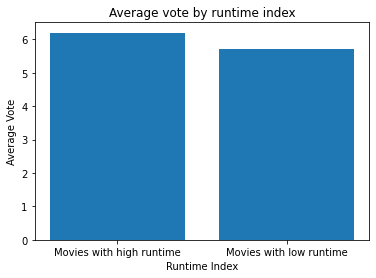

In [94]:
#average vote for above_runtime_median
high_runtime_average_vote = above_runtime_median['vote_average'].median()
#average vote for below_runtime_median
low_runtime_average_vote = below_runtime_median['vote_average'].median()

#make a bar chart between average vote of the two data frames
locations =[1,2]
hights = [high_runtime_average_vote, low_runtime_average_vote]
labels = ['Movies with high runtime','Movies with low runtime']
plt.bar(locations, hights, tick_label=labels)
plt.title('Average vote by runtime index')
plt.xlabel('Runtime Index')
plt.ylabel('Average Vote')

### Notice from the above chart that the difference between the average votes is not significant, this indicates weak or negligible relation between runtime and average vote.

### Making sure that the correlation between runtime and average vote is very low:

In [95]:
#create variable holds runtime and votes
runtime_vote = df[['runtime','vote_average']]
#create the correlation between runtime and vote
corre = runtime_vote.corr(method='pearson')
#check the correlation
corre

,runtime,vote_average
runtime,1.000000,0.300612
vote_average,0.300612,1.000000


### Notes above that Pearson's Correlation Coefficient (r) = 0.3, this indicates a very low to nigilable correlation.

## Research Question 3: which production company has the greatest average of revenue over the dataset?


### Creating bar chart to show top 10 production companies in average revenue.

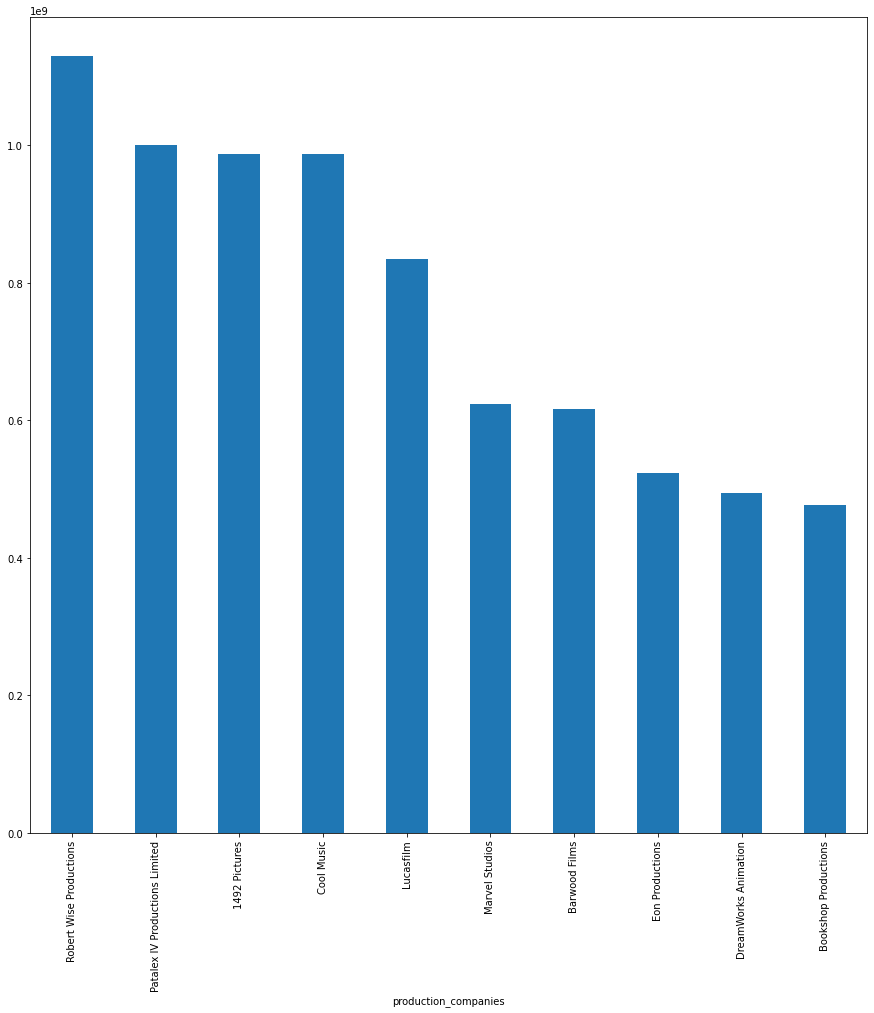

In [97]:
#complete_revenue.groupby('production_companies').sum()['revenue_adj']
company_revenue_sum=complete_revenue_budget.groupby('production_companies').median()['revenue_adj']
#sorting companies by average revenue
sorted_companies = company_revenue_sum.sort_values(ascending=False)
#extracting top 10 companies
top10_companies = sorted_companies[:10]
#making bar chart to view top 10 companies
top10_companies_plot=top10_companies.plot(kind='bar',figsize=(15,15))

### Note that the best company in average revenue is: Robert Wise Production
**Y axis represents the average revenue in billions.**

<a id='conclusions'></a>
## Conclusions

**Research Question 1: What kinds of properties are associated with movies that have high revenues?**

properties associated with movies that have high revenues:

1- In general, movies with higher budget have higher chance of getting higher revenue than movies with lower budget. This finding was obvious in "Average Budget By Revenue Index" chart, as the difference between the budget averages was significant. The finding was confirmed after applying Pearson Correlation method, as Pearson's Correlation Coefficient gave us Moderate positive correlation between Budget and Revenue in general. So in general we can say high revenue movies have high budget

2- In general, Movies with higher revenue have higher popularity, this was also obvious in "Average Popularity By Revenue Index" chart, as the difference between the popularity averages was obvious. We can say that movies with higher popularity have higher chance of getting higher revenue.

3- Genre or category of a movie does not affect the revenue of that movie, this was obvious in genres percentage comparison between high revenue moveis and low revenue movies check the plots: (high_revenue_genres_plot, low_revenue_genres_plot), as the top 5 movies were produced almost the same in both types.

**Research Question 2: Does the Runtime of a movie affect the average vote?**
No strong relation between Runtime and average vote was found in the dataset. This was obvious in "Average vote by runtime index" plot which compare the average votes of high Runtime movies and low Runtime movies, as the difference was negligible.

**Research Question 3: which production company has the greatest average of revenue over the dataset?**

***Robert Wise Production*** is the best company in our dataset in average revenue, please check **top10_companies_plot**.


### Limitations
**limitaion 1:** It could be more helpful if Cast column was replaced with the name of the superstar only, as the revenues may differ according to the superstar name.

**limitation 2:** Almost half of the dataset has missing information about the revenue and budget.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])